# Regularization and Gradient Descent Exercises 

### Introduction 
Short tutorial on regression, polynomial features, and regularization. 
Data is `X_Y_Sinusoid_Data.csv`

In [5]:
from __future__ import print_function 
import os 
data_path = ['C:/Users/japor/Desktop/Machine Learning 501 Nervana/Intel-ML101-Class4/data']

### Question 1
* Import data 


In [7]:
import pandas as pd 
import numpy as np 

filepath = os.sep.join(data_path + ['X_Y_Sinusoid_Data.csv'])
data = pd.read_csv(filepath)
data

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121
5,0.289299,0.498330
6,0.342805,0.597502
7,0.345499,0.629410
8,0.386477,0.822705
9,0.430047,0.557581


* Generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$


In [11]:
X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

* Plot the sparse data (x vs. y) and the calculated ("real") data

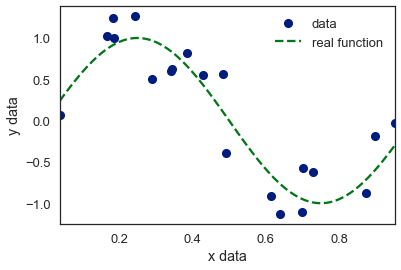

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns 

% matplotlib inline

sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

# Plot of noisy (sparse) data
ax = data.set_index('x')['y'].plot(ls = '', marker = 'o', label = 'data')
ax.plot(X_real, Y_real, ls = '--', marker = '', label = 'real function');

ax.legend()
ax.set(xlabel = 'x data', ylabel = 'y data');


### Question 2 
* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th-order polynomial features 


In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features 
degree = 20 
pf = PolynomialFeatures(degree)
lr = LinearRegression() 

# Extract the X- and Y- data from the dataframe 
X_data = data[['x']]
Y_data = data['y']

# Create the polynomial features
X_poly = pf.fit_transform(X_data)


* Fit this data using linear regression 

In [27]:
# Fit the linear regression model 
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)


* Plot the resulting predicted value compared to the calculated data 

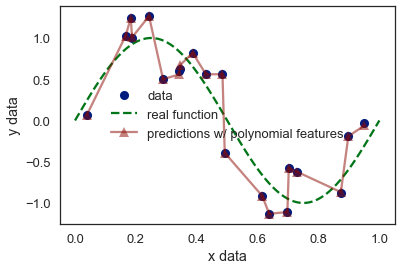

In [31]:
# Plot the results 
plt.plot(X_data, Y_data, marker = 'o', ls = '', label = 'data', alpha = 1) # actual data 
plt.plot(X_real, Y_real, ls = '--', label = 'real function') # true function 
plt.plot(X_data, Y_pred, marker = '^', alpha = 0.5, label = 'predictions w/ polynomial features')
plt.legend()

ax = plt.gca()
ax.set(xlabel = 'x data', ylabel = 'y data'); 

### Question 3 
* Perform the regression on data with polynomial features using ridge regression $\alpha$ =0.001) and lasso regression ($\alpha$ =0.0001)

In [34]:
from sklearn.linear_model import Ridge, Lasso

# Mute the sklearn warning about regularization 
import warnings 
warnings.filterwarnings('ignore', module = 'sklearn')

# Ridge Regression Model (L2) 
rr = Ridge(alpha = 0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# Lasso Regression Model (L1) 
lassor = Lasso(alpha = 0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

* Plot the results 

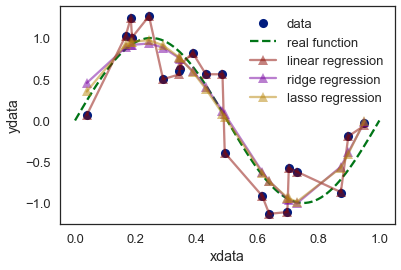

In [45]:
# Plot the predicted values 
plt.plot(X_data, Y_data, marker = 'o', ls = '', label = 'data');
plt.plot(X_real, Y_real, ls = '--', label = 'real function'); 
plt.plot(X_data, Y_pred, label = 'linear regression', marker = '^', alpha = 0.5);
plt.plot(X_data, Y_pred_rr, label = 'ridge regression', marker = '^', alpha = 0.5);
plt.plot(X_data, Y_pred_lr, label = 'lasso regression', marker = '^', alpha = 0.5);

plt.legend();

ax = plt.gca()
ax.set(xlabel = 'xdata', ylabel = 'ydata');

* Plot the magnitude of the coefficients obtained from these regressions and compare them to those obtained from linear regression in the previous question.  The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude. 

In [59]:
# Look at the absolute value of coefficients for each model 
coefficients = pd.DataFrame() 
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs) # applys absolute value element-wise 

coefficients

,linear regression,ridge regression,lasso regression
0,3.783472e+12,0.000000,0.000000
1,1.619371e+07,6.065176,8.490500
2,4.660425e+08,12.429635,20.176708
3,7.679855e+09,4.070127,1.641353
4,8.271033e+10,2.307194,5.698488
5,6.233828e+11,4.432550,4.601939
6,3.416390e+12,4.135200,2.170905
7,1.389090e+13,2.883507,0.252181
8,4.214545e+13,1.484636,0.000000
9,9.444700e+13,0.307927,0.000000


In [58]:
# Note large difference in scale between non-regularized vs. regularized regression
coefficients.describe()

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.777551e+13,2.169397,2.167284
std,6.031941e+13,2.900278,4.706731
min,1.619371e+07,0.000000,0.000000
25%,3.416390e+12,0.467578,0.000000
50%,3.621188e+13,1.017272,0.252181
75%,1.070540e+14,2.883507,1.641353
max,1.655347e+14,12.429635,20.176708


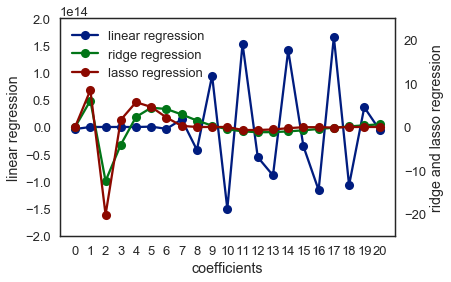

In [86]:
colors = sns.color_palette() 

# Plot the predicted values (regularized and non-regularized)
# Set up the dual y-axes 
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data 
ax1.plot(lr.coef_.ravel(), 
         color = colors[0], marker = 'o', label = 'linear regression');

# Plot the regularization data 
ax2.plot(rr.coef_.ravel(), 
         color = colors[1], marker = 'o', label = 'ridge regression');
ax2.plot(lassor.coef_.ravel(), 
         color = colors[2], marker = 'o', label = 'lasso regression');

# Customize axes scales 
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25,25)

# Combine the legends 
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2);

ax1.set(xlabel = 'coefficients', ylabel = 'linear regression');
ax2.set(ylabel = 'ridge and lasso regression');

ax1.set_xticks(range(len(lr.coef_))); 

In [85]:
print(l1)
print(l2)

['linear regression']
['ridge regression', 'lasso regression']


### Question 4
Work with housing prices in Ames, Iowa dataset

* Import the data with pandas, remove null values, and one-hot encode categoricals 

In [177]:
data_path = ['C:/Users/japor/Desktop/Machine Learning 501 Nervana/Intel-ML101-Class4/data']
filepath = os.sep.join(data_path + ['Ames_Housing_Sales.csv'])
data = pd.read_csv(filepath, sep = ',')

Create a list of categorical data and one-hot encode. Pandas one-hot encoder (`get_dummies`) works well with data that is defined as a categorical 

In [197]:
# get a pd.series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == np.object] 
one_hot_encode_cols = one_hot_encode_cols.index.tolist() # list of categorical fields

# another way of one-hot-encoding: 
# encode these columns as categoricals so one hot encoding works on split data 
for col in one_hot_encode_cols: 
    data[col] = pd.Categorical(data[col])
    


Series([], dtype: object)

In [199]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0,0,0,0,0,1,0,1,1,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0,0,0,0,0,1,0,1,1,0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0,0,0,0,0,1,0,1,1,0


In [201]:
# Do one hot encoding 
data = pd.get_dummies(data, columns = one_hot_encode_cols)
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0,0,0,0,0,1,0,1,1,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0,0,0,0,0,1,0,1,1,0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0,0,0,0,0,1,0,1,1,0


Split the data into train and test data sets 

In [202]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.3, random_state = 42)

There are columns with skewed features--a log transformation can be applied to them.  Our predictor `SalesPrice` is also skewed, but we will keep that one as is 

In [203]:
# Create a list of float columns to check for skewing 
mask = data.dtypes == np.float 
float_cols = data.columns[mask]
data.columns[mask]

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF',
       'SalePrice'],
      dtype='object')

In [204]:
skew_limit = 0.75
skew_vals = train[float_cols].skew() # .skew() measures skew of data 

skew_vals

1stFlrSF          1.539692
2ndFlrSF          0.773655
3SsnPorch        10.150612
BsmtFinSF1        2.010766
BsmtFinSF2        4.466378
BsmtUnfSF         0.900308
EnclosedPorch     3.218303
GarageArea        0.838422
GarageYrBlt      -0.649707
GrLivArea         1.455564
LotArea          11.501694
LotFrontage       3.138032
LowQualFinSF     11.210638
MasVnrArea        2.492814
MiscVal          26.915364
OpenPorchSF       2.295489
PoolArea         15.777668
ScreenPorch       4.599803
TotalBsmtSF       1.979164
WoodDeckSF        1.334388
SalePrice         2.106910
dtype: float64

In [155]:
skew_cols = (skew_vals
             .sort_values(ascending = False)
             .to_frame() # format into dataframe 
             .rename(columns = {0: 'Skew'}) # add column "Skew" with skew_vals
             .query('abs(Skew) > {0}'.format(skew_limit))) # query if abs(Skew) greater than skew limit
             
skew_cols # only columns with skew > 0.75

,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
ScreenPorch,4.599803
BsmtFinSF2,4.466378
EnclosedPorch,3.218303
LotFrontage,3.138032
MasVnrArea,2.492814


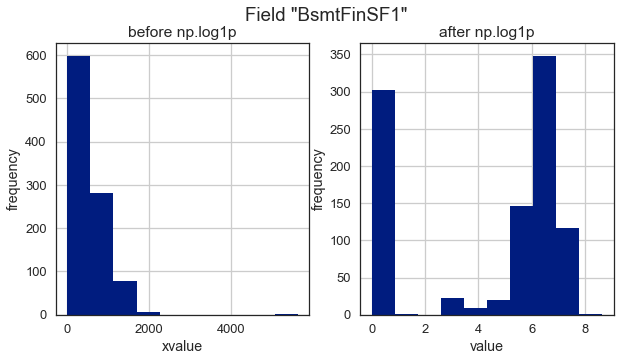

In [205]:
# Look at what happens to one of the features when we apply np.log1p visually 
field = 'BsmtFinSF1'
fig, (ax_before, ax_after) = plt.subplots(1,2, figsize = (10,5))
train[field].hist(ax = ax_before)
train[field].apply(np.log1p).hist(ax = ax_after)

ax_before.set(title = 'before np.log1p', ylabel = 'frequency', xlabel = 'xvalue')
ax_after.set(title = 'after np.log1p', ylabel = 'frequency', xlabel = 'value')
fig.suptitle('Field "{}"'.format(field)); 
# skewness is reduced a little after transformation 

In [206]:
# Mute the settings with a copy warnings 
pd.options.mode.chained_assignment = None 

for col in skew_cols.index.tolist(): 
    if col == "SalePrice":
        continue 
    train[col] = np.log1p(train[col]) # both these lines do the same thing
    test[col] = test[col].apply(np.log1p) # both these lines do the same thing

Separate features from predictor. 

In [213]:
feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols]
y_train = train['SalePrice']

X_test = test[feature_cols]
y_test = test['SalePrice']


### Question 5 
* Write a function `rmse` that takes in truth and prediction values and returns the root-mean-squared error. User sklearn's `mean_squared_error`. 

In [218]:
from sklearn.metrics import mean_squared_error 

def rmse(ytrue, ypredicted): 
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

* Fit a basic linear regression model 
* Print the root-mean-squared error for this model
* Plot the predicted vs actual sale price based on the model 

In [220]:
from sklearn.linear_model import LinearRegression 

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

306369.683423


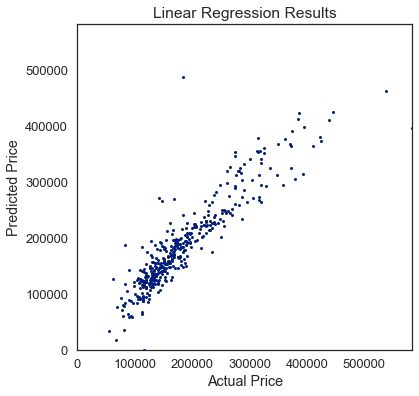

In [231]:
f = plt.figure(figsize = (6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
        marker = 'o', ls = '', ms = 3.0);

lim = (0, y_test.max())

ax.set(xlabel = 'Actual Price', 
       ylabel = 'Predicted Price', 
       xlim = lim, 
       ylim = lim,
       title = 'Linear Regression Results');


### Question 6
Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in. 
* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated cross error function you created above. 
* Use
$$[0.005,0.05,0.1,0.3,1,3,5,10,15,30,80]$$
as the range of alphas.

Now for the `RidgeCV` method. It's not possible to get the $\alpha$ values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above. 

In [239]:
from sklearn.linear_model import RidgeCV

alpha = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas = alpha, 
                  cv = 4).fit(X_train, y_train) 
                  # cv = 4 using k-folds, splitting into k smaller sets 
    
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print (ridgeCV.alpha_, ridgeCV_rmse)
# output for the optimal alpha and rmse: 15 32169.1762057

15 32169.1762057


### Question 7 
Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination. 

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model. 

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization. 
* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model. 
* Repeat this with the Elastic net model. 
* Compare the results via table and/or plot. 

Use the following $\alpha$: 
$$[1e-5, 5e-5, 0.0001, 0.0005]$$

In [240]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas = alphas2, 
                  max_iter = 5e4, 
                  cv = 3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse) # lasso is slower 
# output for the optimal alpha and rmse: 0.0005 39257.3939914

0.0005 39257.3939914


We can determine how many of these features remain non-zero 

In [243]:
print ('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                                len(lassoCV.coef_.nonzero()[0])))

Of 294 coefficients, 272 are non-zero with Lasso.


Now try the elastic net, with the same $\alpha$ as in Lasso, and L1_ratios between 0.1 and 0.9

In [258]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas = alphas2, 
                            l1_ratio = l1_ratios, 
                            max_iter = 1e4).fit(X_train, y_train)

elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)
# output for optimal alpha, l1_ratio, and rmse: 0.0005 0.1 35001.2342961

0.0005 0.1 35001.2342961


In [260]:
# RMSE calculations from all models 
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear','Ridge','Lasso','ElasticNet']

rmse_df = pd.Series(rmse_vals, index = labels).to_frame()
rmse_df.rename(columns = {0: 'RMSE'}, inplace = 1)
rmse_df

,RMSE
Linear,306369.683423
Ridge,32169.176206
Lasso,39257.393991
ElasticNet,35001.234296


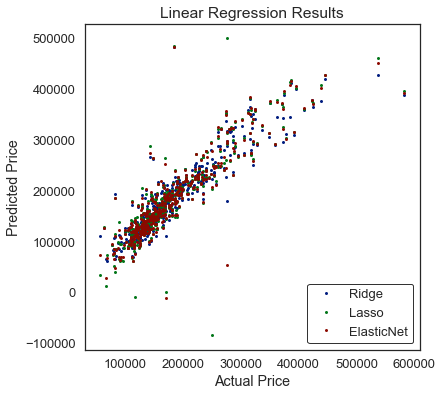

In [261]:
# Plot of actual vs. predicted housing prices
f = plt.figure(figsize = (6,6))
ax = plt.axes()

labels = ['Ridge','Lasso','ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
            marker = 'o', ls = '', ms = 3.0, label = lab)
    
leg = plt.legend(frameon = True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel = 'Actual Price', 
       ylabel = 'Predicted Price', 
       title = 'Linear Regression Results');

### Question 8 
Let's explore Stochastic Gradient Descent in this exercise.
Recall that Linear models in general are sensitive to scaling. However, SGD is *very* sensitive to scaling. Morever, a high learning rate value can cause the algorithm to diverge, whereas a too low value may take too long to converge. 
* Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`). 
* Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above
* Do not scale the data before fitting the model
* Compare the results to those obtained without using stochastic gradient descent 

In [282]:
# Import SGDRegressor and prepare the parameters 

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'}, 
    'Lasso': {'penalty': 'l2',  # L2 penalty
              'alpha': lassoCV.alpha_}, 
    'Ridge': {'penalty': 'l1', # L1 penalty
              'alpha': ridgeCV_rmse}, 
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_, 
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items(): 
    SGD = SGDRegressor(**parameters) # passes dict items as arguments 
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))
    
rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD
Linear,306369.683423,7.351898e+15
Ridge,32169.176206,2.836937e+15
Lasso,39257.393991,6.720309e+15
ElasticNet,35001.234296,8.221934e+15


Errors are high because algorithm is diverging. This can be due to scaling and/or learning rate being too high. Let's adjust the learning rate and see what happens. 
* Pass in `eta0 = 1e-07` when creating the instance of `SGDClassifier`. 
* Re-compute the errors for all the penalties and compare

In [285]:
# pass in eta0 = 1e-07 as learning rate 

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    SGD = SGDRegressor(eta0 = 1e-7, ** parameters) # passes the dict items as args
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))
    
rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses) 
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,306369.683423,7.351898e+15,77094.416791
Ridge,32169.176206,2.836937e+15,75932.791131
Lasso,39257.393991,6.720309e+15,78696.954293
ElasticNet,35001.234296,8.221934e+15,79258.109420


 * **RMSE** = root-mean-squared-error without stochastic gradient descent 
 * **RMSE-SGD** = with stochastic gradient descent and default learning rate (1e-1)
 * **RMSE-SGD-learning rate** = with stochastic gradient descent and learning rate 1e-7
 

Let's scale our training data and try again. 
* Fit a `MinMaxScaler` to `X_train` create a variable `X_train_scaled`
* Using the scaler, transform `X_test` and create a variable `X_test_scaled`
* Apply the same versions of SGD to them and compare the results. Don't pass in `eta0` this time 

In [287]:
# Use scaled train and test data (Hint: use scaler.fit_transform)
# don't pass eta0 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items(): 
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))
    
rmse_df['RMSE-SGD-MinMaxScaled'] = pd.Series(new_rmses)
rmse_df


,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-MinMaxScaled
Linear,306369.683423,7.351898e+15,77094.416791,34742.337271
Ridge,32169.176206,2.836937e+15,75932.791131,77716.607422
Lasso,39257.393991,6.720309e+15,78696.954293,35429.009736
ElasticNet,35001.234296,8.221934e+15,79258.109420,34631.328290


In [298]:
new_rmses = {}
for modellabel, parameters in model_parameters_dict.items(): 
    SGD = SGDRegressor(eta0 = 1e-3, **parameters) # default eta0 of 1e-2 is better
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))
    
rmse_df['RMSE-SGD-MinMaxScaled-learningrate'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-MinMaxScaled,RMSE-SGD-MinMaxScaled-learningrate
Linear,306369.683423,7.351898e+15,77094.416791,34742.337271,45966.442358
Ridge,32169.176206,2.836937e+15,75932.791131,77716.607422,78063.264318
Lasso,39257.393991,6.720309e+15,78696.954293,35429.009736,45635.080080
ElasticNet,35001.234296,8.221934e+15,79258.109420,34631.328290,46015.675690
